# MetroBikes Clustering

## Contents
### Import Libraries and Data
### Data Preparation
### Clustering Analysis
### Clustering Analysis without IDs

## Import Libraries and Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# import cleaned bike data
bikes = pd.read_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 6\Austin Bikes\Short Trips Merge.csv')

In [3]:
# list bike table columns
bikes.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Trip ID', 'Membership or Pass Type',
       'Bicycle ID', 'Bike Type', 'Checkout Datetime', 'Checkout Date',
       'Checkout Time', 'Checkout Kiosk ID', 'Checkout Kiosk',
       'Checkout Kiosk Status', 'Checkout Location',
       'Checkout City Asset Number', 'Checkout Number of Docks',
       'Checkout Council District', 'Trip Duration Minutes', 'Month', 'Year',
       'Return Kiosk ID', 'Return Kiosk', 'Return Kiosk Status',
       'Return Location', 'Return City Asset Number', 'Return Number of Docks',
       'Return Council District'],
      dtype='object')

## Data Preparation

In [3]:
# create small table with only variables for clustering
df = bikes[['Checkout Kiosk ID', 'Checkout Number of Docks', 'Checkout Council District', 'Trip Duration Minutes', 'Month', 'Year',  'Return Kiosk ID', 'Return Number of Docks', 'Return Council District']]

In [5]:
# make sure all variable are a numerical dtype
df.dtypes

Checkout Kiosk ID              int64
Checkout Number of Docks     float64
Checkout Council District    float64
Trip Duration Minutes          int64
Month                          int64
Year                           int64
Return Kiosk ID                int64
Return Number of Docks       float64
Return Council District      float64
dtype: object

In [6]:
# drop all entries that have NA
df.dropna(inplace = True)

C:\Users\kacie\AppData\Local\Temp\ipykernel_2588\3734412769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


## Clustering Analysis

In [7]:
# Find # of clusters to use
cl_num = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in cl_num]

In [8]:
# score each cluster
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [9]:
# visualize scores
score

[-1417312566546.7026,
 -627019297552.5969,
 -331346516937.8838,
 -85802563282.36823,
 -71875062189.44623,
 -61666693062.46796,
 -52697611591.65398,
 -45575775951.89114,
 -39452959305.86676]

Text(0, 0.5, 'Score')

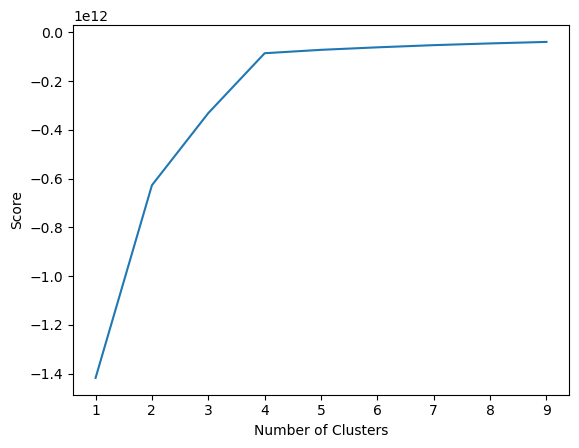

In [10]:
# plot scores
pl.plot(cl_num, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')

In [11]:
# fit data to kmeans using 4 clusters
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df)

C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [12]:
# create column for cluster assignment
df['Cluster'] = kmeans.fit_predict(df)

C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kacie\AppData\Local\Temp\ipykernel_10848\2313921188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(df)


In [13]:
# check table
df.head()

,Checkout Kiosk ID,Checkout Number of Docks,Checkout Council District,Trip Duration Minutes,Month,Year,Return Kiosk ID,Return Number of Docks,Return Council District,Cluster
0,2496,14.0,9.0,3,12,2017,2495,15.0,9.0,0
1,2495,15.0,9.0,14,3,2015,2495,15.0,9.0,0
3,2552,13.0,9.0,29,10,2014,2496,14.0,9.0,0
4,2498,17.0,9.0,10,3,2015,2549,13.0,9.0,0
5,2542,12.0,3.0,8,8,2017,2495,15.0,9.0,0


In [14]:
# count number of entries per cluster
df['Cluster'].value_counts()

Cluster
0    758746
1    540029
2    305190
3    261293
Name: count, dtype: int64

Text(0.5, 1.0, 'Length vs Council District')

C:\Users\kacie\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\kacie\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


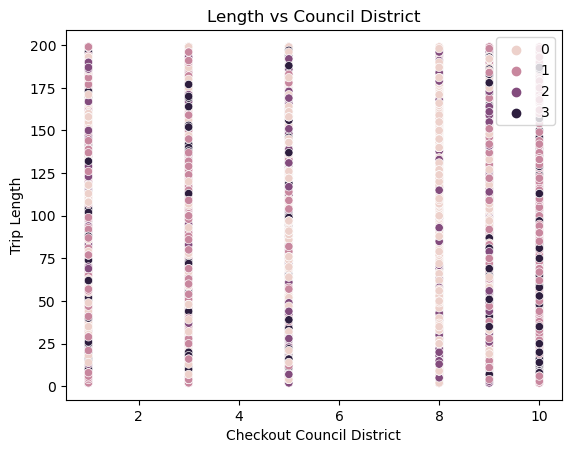

In [15]:
# create scatterplot of trip length vs Checkout Council District
sns.scatterplot(x = df['Checkout Council District'], y = df['Trip Duration Minutes'], hue = kmeans.labels_)
plt.xlabel('Checkout Council District')
plt.ylabel('Trip Length')
plt.title('Length vs Council District')

# data does not appear to be clustered by council district

In [73]:
ct_COCouncil = pd.crosstab(df['Checkout Council District'], df['Cluster'])

Text(0.5, 1.0, 'Count of Checkout District by Cluster')

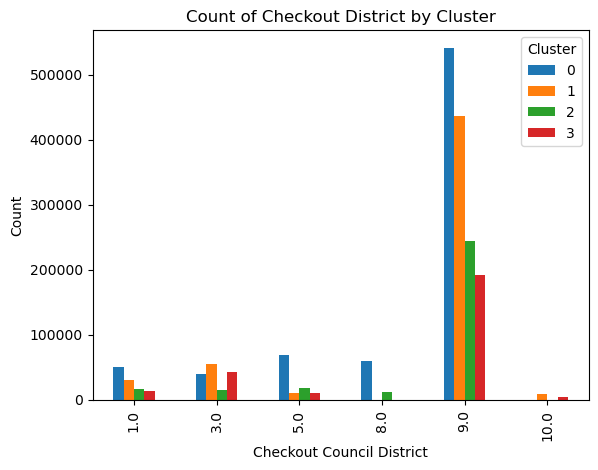

In [74]:
ct_COCouncil.plot(kind = 'bar')
plt.xlabel('Checkout Council District')
plt.ylabel('Count')
plt.title('Count of Checkout District by Cluster')

Text(0.5, 1.0, 'Length vs Kiosk ID')

C:\Users\kacie\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\kacie\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


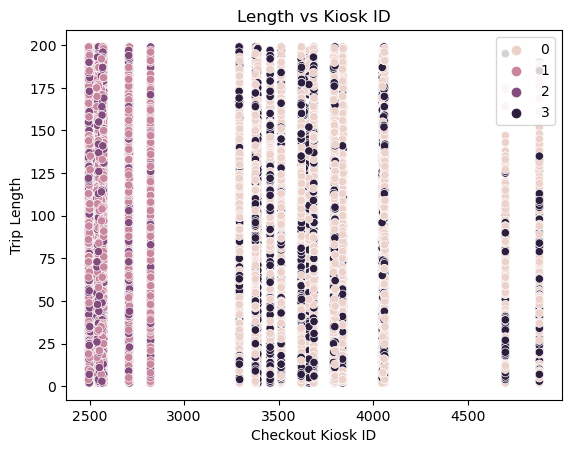

In [32]:
# create scatterplot for trip length vs Checkout Kiosk ID
sns.scatterplot(x = df['Checkout Kiosk ID'], y = df['Trip Duration Minutes'], hue = kmeans.labels_)
plt.xlabel('Checkout Kiosk ID')
plt.ylabel('Trip Length')
plt.title('Length vs Kiosk ID')

# Data appears to be partially clustered by Kiosk ID

In [70]:
ct_duration = pd.crosstab(df['Trip Duration Minutes'], df['Cluster'])

Text(0.5, 1.0, 'Trip Length Count by Cluster')

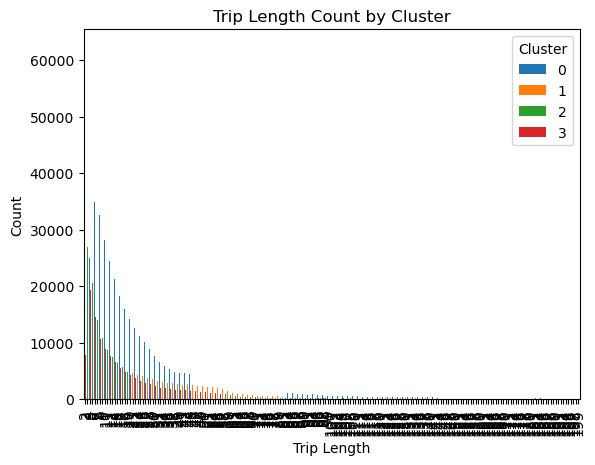

In [71]:
ct_duration.plot(kind = 'bar')
plt.xlabel('Trip Length')
plt.ylabel('Count')
plt.title('Trip Length Count by Cluster')

# data appears to be partially clustered by trip length

Text(0.5, 1.0, 'Kiosk IDs')

C:\Users\kacie\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\kacie\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


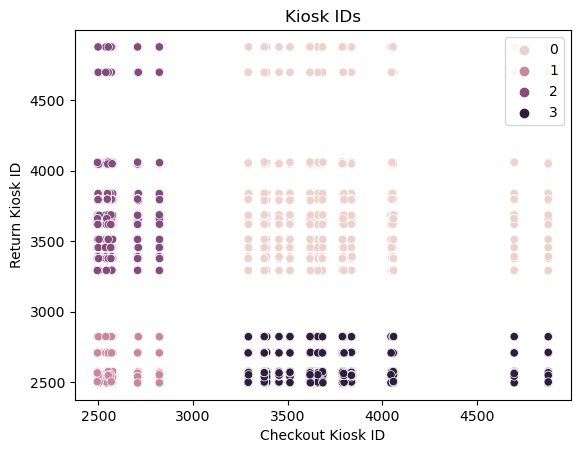

In [33]:
# create scatterplot for checkout and return kiosk IDs
sns.scatterplot(x = df['Checkout Kiosk ID'], y = df['Return Kiosk ID'], hue = kmeans.labels_)
plt.xlabel('Checkout Kiosk ID')
plt.ylabel('Return Kiosk ID')
plt.title('Kiosk IDs')

# data appears to be clustered by checkout and return kiosk combinations

In [75]:
# create table with counts of checkout and return kiosk ID combination counts
kiosks = bikes[['Checkout Kiosk ID', 'Return Kiosk ID']]
kiosk_grouped = kiosks.groupby(['Checkout Kiosk ID', 'Return Kiosk ID']).size().reset_index(name='counts')

Text(0.5, 1.0, 'Kiosk IDs')

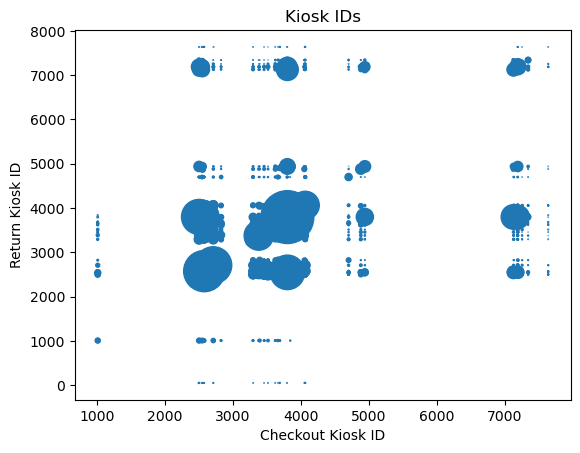

In [80]:
# plot frequenccies of checkout and return kiosk ID combinations
plt.scatter(kiosk_grouped['Checkout Kiosk ID'], kiosk_grouped['Return Kiosk ID'], s = kiosk_grouped['counts']*.05)
plt.xlabel('Checkout Kiosk ID')
plt.ylabel('Return Kiosk ID')
plt.title('Kiosk IDs')

In [66]:
# create a crosstable for checkout kiosk ID and cluster
ct_COkiosk = pd.crosstab(df['Checkout Kiosk ID'], df['Cluster'])
ct_COkiosk

Cluster,0,1,2,3
Checkout Kiosk ID,,,,
2494,35371,0,8866,0
2495,30830,0,8196,0
2496,16154,0,4754,0
2497,26309,0,8662,0
2498,30133,0,34998,0
...,...,...,...,...
4060,0,4306,0,3450
4061,0,14604,0,5601
4062,0,9679,0,3504


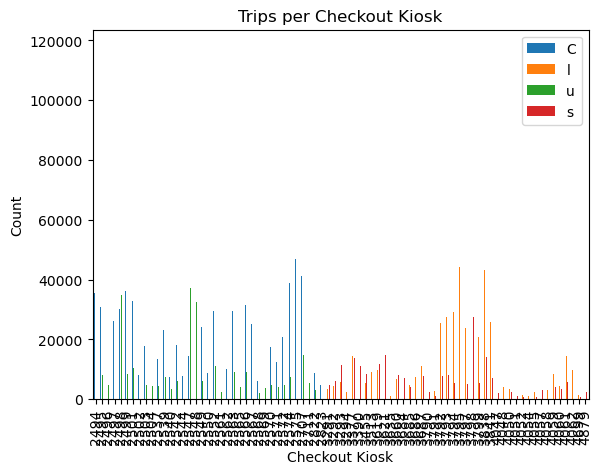

In [69]:
# plot counts of checkout kiosk IDs
ct_COkiosk.plot(kind = 'bar')
plt.xlabel('Checkout Kiosk')
plt.title('Trips per Checkout Kiosk')
plt.ylabel('Count')
plt.legend('Cluster')

# data is partially clustered by Kiosk ID

Text(0.5, 1.0, 'Council Districts')

C:\Users\kacie\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\kacie\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


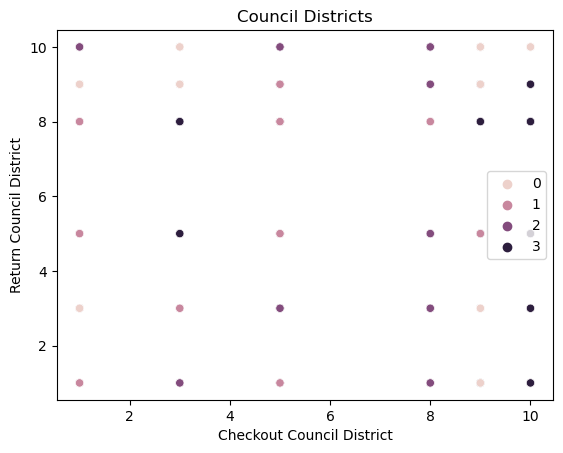

In [37]:
# create scatterplot for checkout and return council districts
sns.scatterplot(x = df['Checkout Council District'], y = df['Return Council District'], hue = kmeans.labels_)
plt.xlabel('Checkout Council District')
plt.ylabel('Return Council District')
plt.title('Council Districts')

In [34]:
# list columns for table being analyzed
df.columns

Index(['Checkout Kiosk ID', 'Checkout Number of Docks',
       'Checkout Council District', 'Trip Duration Minutes', 'Month', 'Year',
       'Return Kiosk ID', 'Return Number of Docks', 'Return Council District',
       'Cluster'],
      dtype='object')

In [36]:
df.groupby('Cluster').agg({'Trip Duration Minutes': 'mean',
                          'Checkout Number of Docks': 'mean',
                          'Return Number of Docks': 'mean'})

,Trip Duration Minutes,Checkout Number of Docks,Return Number of Docks
Cluster,,,
0,18.202072,16.378646,16.648560
1,26.622187,14.537142,14.520451
2,18.931882,14.543602,14.910151
3,19.892240,14.177628,14.249547


## Clustering Analysis without IDs

In [7]:
# create a table with no ids
df_small = df[['Checkout Number of Docks', 'Checkout Council District', 'Trip Duration Minutes', 'Month', 'Year', 'Return Number of Docks', 'Return Council District']]

In [8]:
# score clusters for kmeans
cl_num = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in cl_num]
score = [kmeans[i].fit(df_small).score(df_small) for i in range(len(kmeans))]

C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

Text(0, 0.5, 'Score')

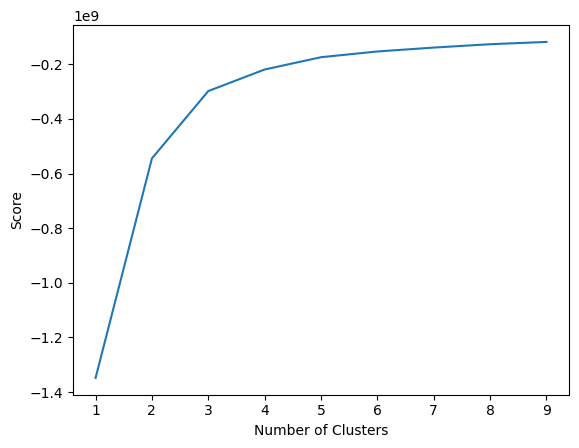

In [18]:
# plot scores
pl.plot(cl_num, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')

In [9]:
# fit data to kmeans using 3 clusters
kmeans = KMeans(n_clusters = 3)
kmeans.fit(df_small)
df_small['Cluster'] = kmeans.fit_predict(df_small)

C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kacie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kacie\AppData\Local\Temp\ipykernel_2588\1280464459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['Cluster'] = kmeans.fit_predict(df_small)


In [10]:
# check table
df_small.head()

,Checkout Number of Docks,Checkout Council District,Trip Duration Minutes,Month,Year,Return Number of Docks,Return Council District,Cluster
0,14.0,9.0,3,12,2017,15.0,9.0,0
1,15.0,9.0,14,3,2015,15.0,9.0,0
3,13.0,9.0,29,10,2014,14.0,9.0,1
4,17.0,9.0,10,3,2015,13.0,9.0,0
5,12.0,3.0,8,8,2017,15.0,9.0,0


In [11]:
df_small.to_csv(r'C:\Users\kacie\Box\Personal\CareerFoundry\Data Immersion\Achievement 6\Austin Bikes\Clustered.csv')

In [22]:
# find counts for each cluster
df_small['Cluster'].value_counts()

Cluster
0    1408922
2     385256
1      71080
Name: count, dtype: int64

Text(0.5, 1.0, 'Length vs Council District')

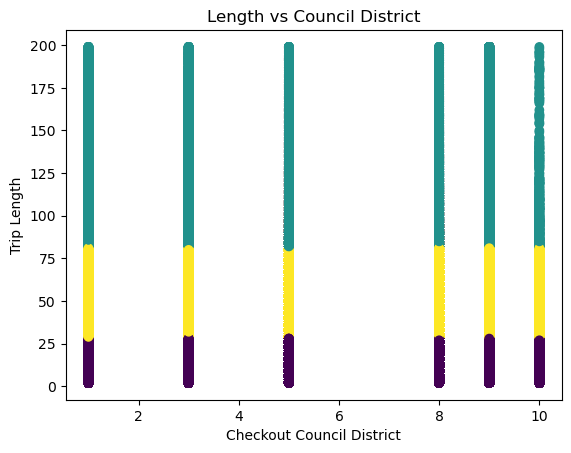

In [26]:
# plot trip length vs checkout council district
plt.scatter(df_small['Checkout Council District'], df_small['Trip Duration Minutes'],  c= kmeans.labels_)
plt.xlabel('Checkout Council District')
plt.ylabel('Trip Length')
plt.title('Length vs Council District')

# the data seems to be clustered by trip length

Text(0.5, 1.0, 'Council Districts')

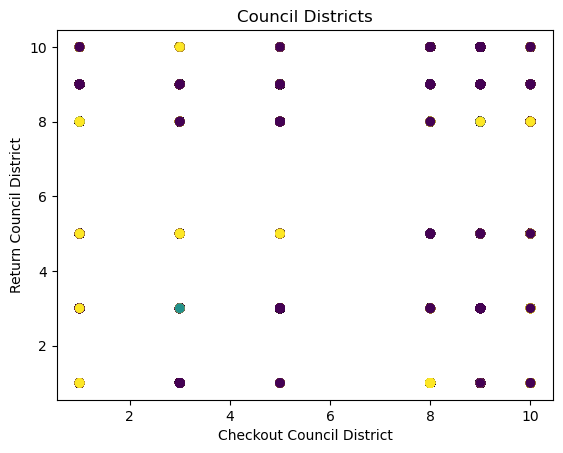

In [33]:
# plot checkout and return council districts
plt.scatter(df_small['Checkout Council District'], df_small['Return Council District'],  c= kmeans.labels_)
plt.xlabel('Checkout Council District')
plt.ylabel('Return Council District')
plt.title('Council Districts')

# the data does not appear to be clustered by checkout and return council district combinations. 

Text(0.5, 1.0, 'Trip Length vs Month')

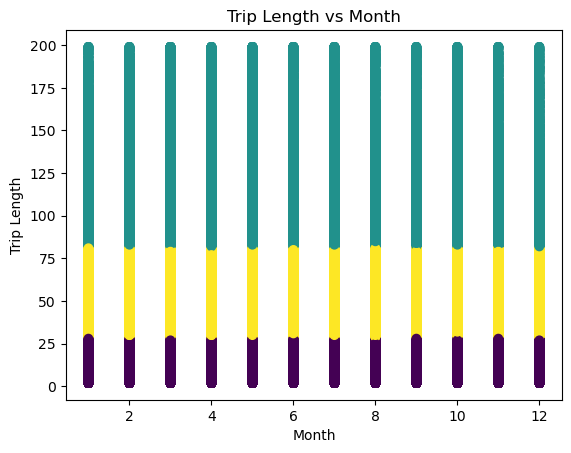

In [34]:
# plot trip length vs month
plt.scatter(df_small['Month'], df_small['Trip Duration Minutes'],  c= kmeans.labels_)
plt.xlabel('Month')
plt.ylabel('Trip Length')
plt.title('Trip Length vs Month')

In [54]:
# create a crosstabe with trip length and cluster
ct_length = pd.crosstab(df_small['Trip Duration Minutes'], df_small['Cluster'])

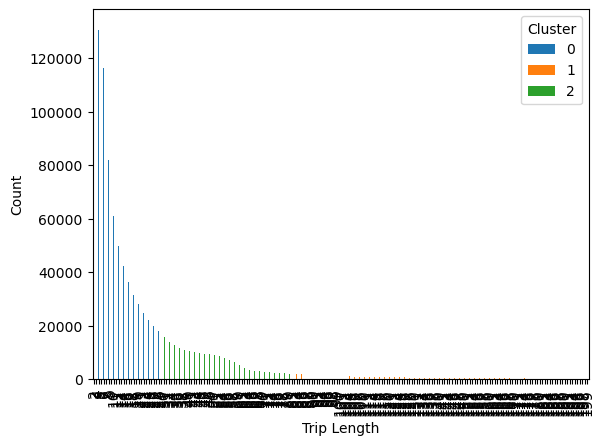

In [53]:
ct_length.plot(kind = 'bar')
plt.xlabel('Trip Length')
plt.ylabel('Count')
plt.legend(title = 'Cluster')

# the clusters are divided by trip length
# cluster 0 is the shortest trips, cluster 1 is the longest trips

In [42]:
# create a crosstab with checkout council district and cluster
ct_COD = pd.crosstab(df_small['Checkout Council District'], df_small['Cluster'])
ct_COD

Cluster,0,1,2
Checkout Council District,,,
1.0,81635,4483,24418
3.0,99436,7531,44756
5.0,64268,6021,36537
8.0,36661,5363,29958
9.0,1119872,47237,245542
10.0,7050,445,4045


Text(0.5, 23.52222222222222, 'Cluster')

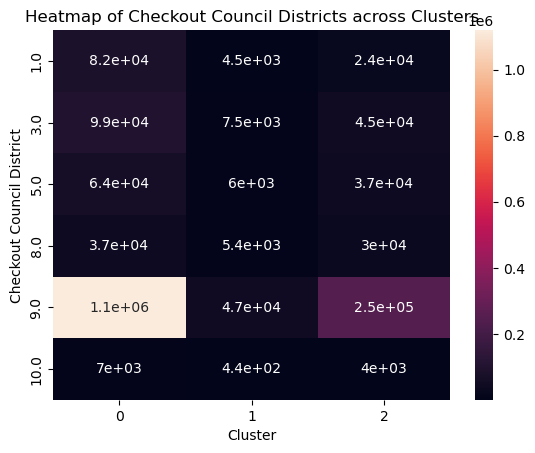

In [41]:
# create a heatmap of checkout council district and cluster
sns.heatmap(ct_COD, annot = True)
plt.title('Heatmap of Checkout Council Districts across Clusters')
plt.ylabel('Checkout Council District')
plt.xlabel('Cluster')

# many of the rides started in Council District 9 belong to cluster '0' and are short trips. 

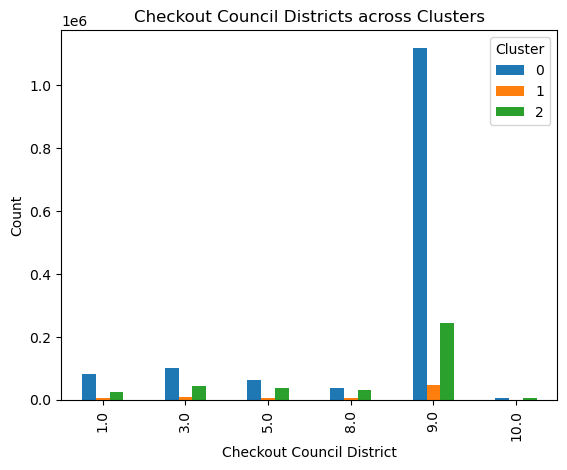

In [43]:
# create a stacked bar plot for checkout district counts divided by clusters
ct_COD.plot(kind='bar')
plt.title('Checkout Council Districts across Clusters')
plt.ylabel('Count')
plt.xlabel('Checkout Council District')
plt.legend(title='Cluster')

# most of the trip begin in council district 9.
# The shortest trips are most popular from all council districts.